In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [39]:
df = pd.read_csv('usgs_earthquake_data_2000_2025.csv')

In [40]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2003-12-30T23:49:27.190Z,-8.160,120.485,200.0,4.7,mb,9.0,147.5,NaN,1.29,...,2014-11-07T01:20:51.696Z,"49 km N of Ruteng, Indonesia",earthquake,NaN,NaN,NaN,6.0,reviewed,us,us
1,2003-12-30T22:41:38.280Z,47.088,154.231,33.0,4.7,mb,64.0,138.1,NaN,1.03,...,2014-11-07T01:20:51.686Z,Kuril Islands,earthquake,NaN,NaN,NaN,31.0,reviewed,us,us
2,2003-12-30T22:40:10.910Z,-29.940,-177.605,33.0,4.7,mb,11.0,225.4,NaN,0.82,...,2014-11-07T01:20:51.685Z,"Kermadec Islands, New Zealand",earthquake,NaN,NaN,NaN,5.0,reviewed,us,us
3,2003-12-30T22:31:59.660Z,46.851,154.066,33.0,4.5,mb,10.0,236.5,NaN,0.70,...,2014-11-07T01:20:51.678Z,east of the Kuril Islands,earthquake,NaN,NaN,NaN,1.0,reviewed,us,us
4,2003-12-30T22:04:37.440Z,47.084,154.202,33.0,5.1,mwc,313.0,127.7,NaN,0.86,...,2016-11-10T00:19:29.999Z,Kuril Islands,earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175947 entries, 0 to 175946
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             175947 non-null  object 
 1   latitude         175947 non-null  float64
 2   longitude        175947 non-null  float64
 3   depth            175947 non-null  float64
 4   mag              175947 non-null  float64
 5   magType          175947 non-null  object 
 6   nst              108892 non-null  float64
 7   gap              158846 non-null  float64
 8   dmin             86167 non-null   float64
 9   rms              171269 non-null  float64
 10  net              175947 non-null  object 
 11  id               175947 non-null  object 
 12  updated          175947 non-null  object 
 13  place            175947 non-null  object 
 14  type             175947 non-null  object 
 15  horizontalError  78807 non-null   float64
 16  depthError       119892 non-null  floa

In [42]:
df['time'] = pd.to_datetime(df['time'])

In [43]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day

In [44]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month,day
0,2003-12-30 23:49:27.190000+00:00,-8.160,120.485,200.0,4.7,mb,9.0,147.5,NaN,1.29,...,NaN,NaN,NaN,6.0,reviewed,us,us,2003,12,30
1,2003-12-30 22:41:38.280000+00:00,47.088,154.231,33.0,4.7,mb,64.0,138.1,NaN,1.03,...,NaN,NaN,NaN,31.0,reviewed,us,us,2003,12,30
2,2003-12-30 22:40:10.910000+00:00,-29.940,-177.605,33.0,4.7,mb,11.0,225.4,NaN,0.82,...,NaN,NaN,NaN,5.0,reviewed,us,us,2003,12,30
3,2003-12-30 22:31:59.660000+00:00,46.851,154.066,33.0,4.5,mb,10.0,236.5,NaN,0.70,...,NaN,NaN,NaN,1.0,reviewed,us,us,2003,12,30
4,2003-12-30 22:04:37.440000+00:00,47.084,154.202,33.0,5.1,mwc,313.0,127.7,NaN,0.86,...,NaN,NaN,NaN,NaN,reviewed,us,hrv,2003,12,30


We will now identify the rows which do not contain information which isnt much helpful to us like

1. ID
2. net
3. status
4. location source
5. Place (since we are already taking the latitude and longitude)
6. Type
7. Updated


In [45]:
df = df.drop(columns=['id','net','status','locationSource','place','type','updated','time'])

In [46]:
df.shape

(175947, 17)

In [47]:
df.isnull().sum()

,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,67055
gap,17101
dmin,89780
rms,4678
horizontalError,97140


Since we have quite a lot of missing data we will drop the

1. gap
2. nst
3. dmin
4. rms
5. horizontal error
6. depth error
7. Magnitude Error
8. Magnitude Nst
9. Magnitude Source
10. Magnitude Type


In [48]:
df = df.drop(columns=['gap','nst','dmin','rms','horizontalError','depthError','magError','magNst','magType','magSource'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175947 entries, 0 to 175946
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   175947 non-null  float64
 1   longitude  175947 non-null  float64
 2   depth      175947 non-null  float64
 3   mag        175947 non-null  float64
 4   year       175947 non-null  int32  
 5   month      175947 non-null  int32  
 6   day        175947 non-null  int32  
dtypes: float64(4), int32(3)
memory usage: 7.4 MB


In [51]:
df.duplicated().sum()

np.int64(7)

In [52]:
exact_dupes = df[df.duplicated(keep=False)]
exact_dupes_sorted = exact_dupes.sort_values(by=list(df.columns))
print(exact_dupes_sorted)

        latitude  longitude  depth  mag  year  month  day
48961   -17.7500  -176.2500  10.00  5.0  2009     11    5
48963   -17.7500  -176.2500  10.00  5.0  2009     11    5
133011   19.4050  -155.2810   0.01  4.9  2018      5   20
133024   19.4050  -155.2810   0.01  4.9  2018      5   20
133074   19.4050  -155.2810   0.01  5.0  2018      5   17
133079   19.4050  -155.2810   0.01  5.0  2018      5   17
7425     51.1680  -179.6700  33.00  4.8  2002      8   10
7426     51.1680  -179.6700  33.00  4.8  2002      8   10
99036    51.7198   177.2578  67.10  4.6  2014     12   15
99037    51.7198   177.2578  67.10  4.6  2014     12   15
8012     53.2570   170.1400  33.00  4.7  2002      6   20
8013     53.2570   170.1400  33.00  4.7  2002      6   20
149539   61.3190  -149.9334  46.00  5.3  2021      2   27
149540   61.3190  -149.9334  46.00  5.3  2021      2   27


In [53]:
df = df.drop_duplicates()

In [54]:
df.duplicated().sum()

np.int64(0)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175940 entries, 0 to 175946
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   175940 non-null  float64
 1   longitude  175940 non-null  float64
 2   depth      175940 non-null  float64
 3   mag        175940 non-null  float64
 4   year       175940 non-null  int32  
 5   month      175940 non-null  int32  
 6   day        175940 non-null  int32  
dtypes: float64(4), int32(3)
memory usage: 8.7 MB


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,175940.0,0.720699,29.272132,-84.1330,-19.997775,-3.1130,23.703625,87.386
longitude,175940.0,41.970647,121.099539,-179.9997,-70.878925,98.6326,142.379850,180.000
depth,175940.0,64.542201,112.600529,-2.2610,10.000000,30.0000,57.200000,700.900
mag,175940.0,4.829108,0.386143,3.3800,4.600000,4.7000,5.000000,9.100
year,175940.0,2012.890213,7.064278,2000.0000,2007.000000,2013.0000,2019.000000,2025.000
month,175940.0,6.458207,3.499934,1.0000,3.000000,6.0000,10.000000,12.000
day,175940.0,15.594407,8.739366,1.0000,8.000000,15.0000,23.000000,31.000


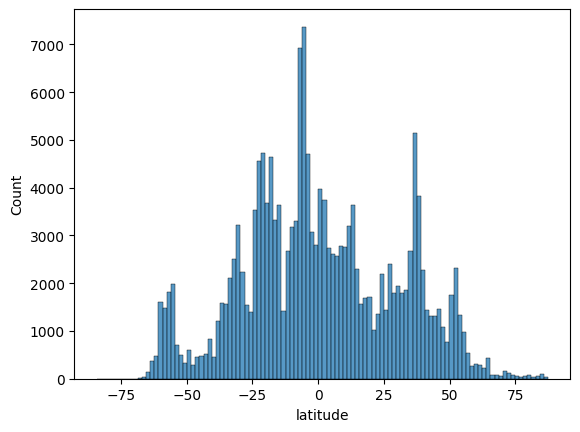

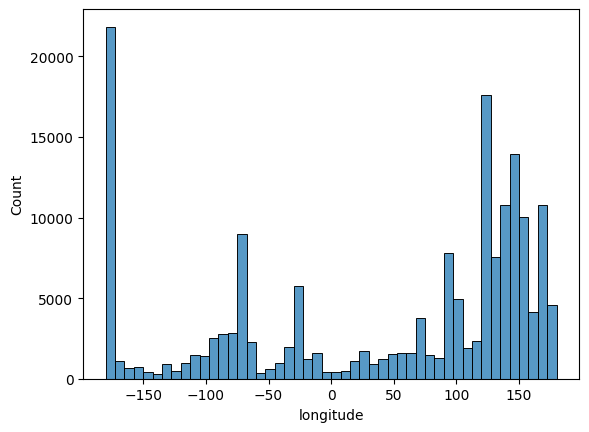

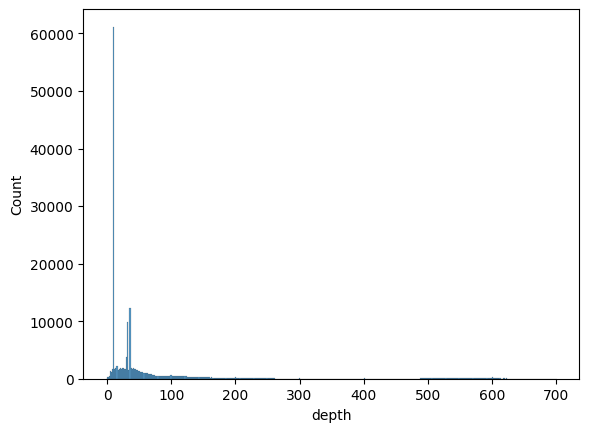

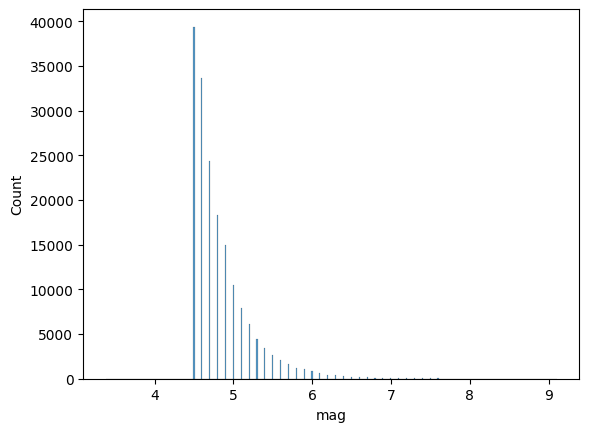

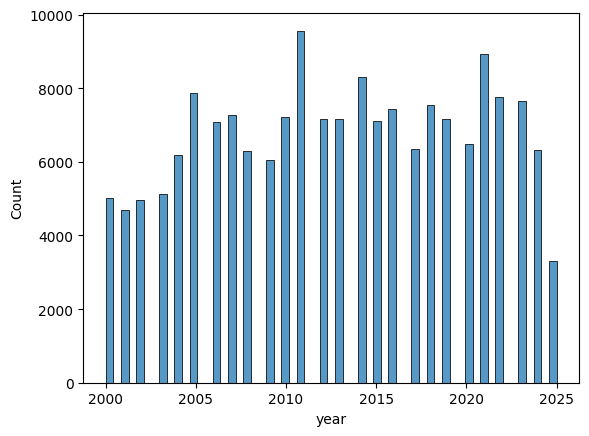

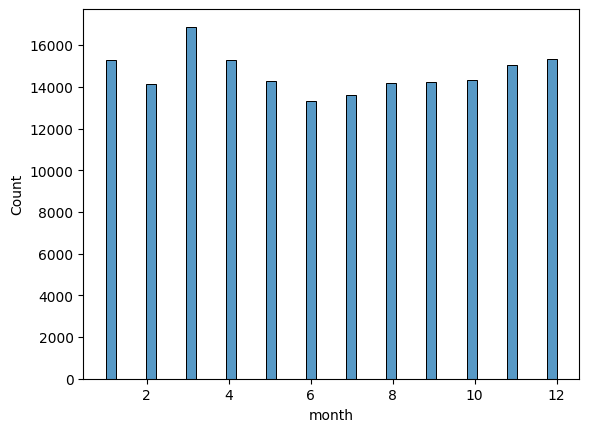

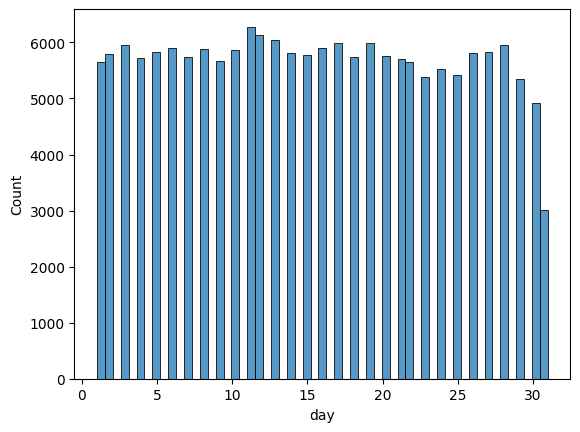

In [61]:
for i in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(df,x=i)
    plt.show()

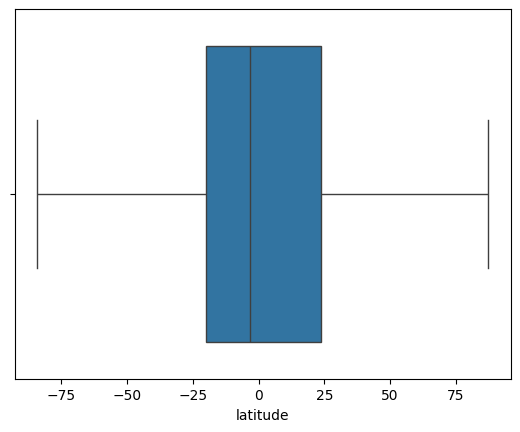

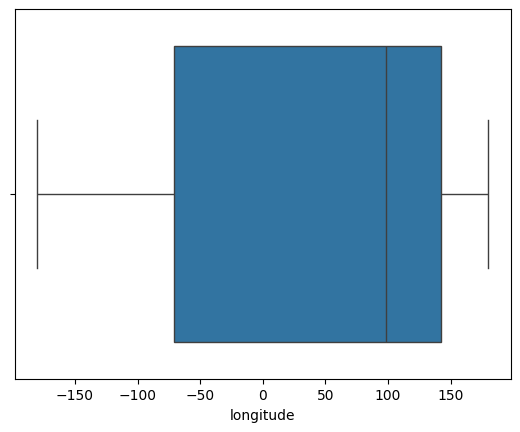

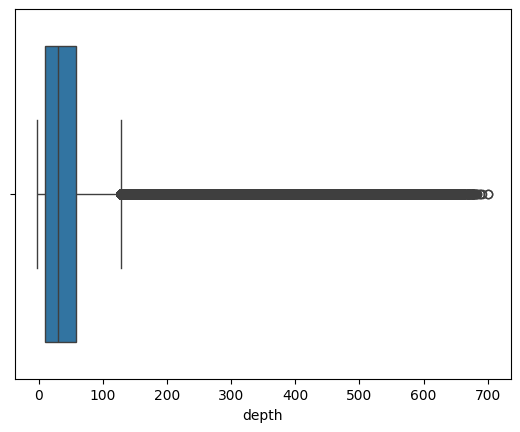

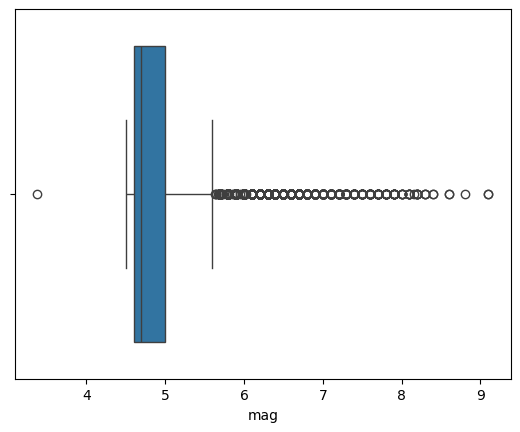

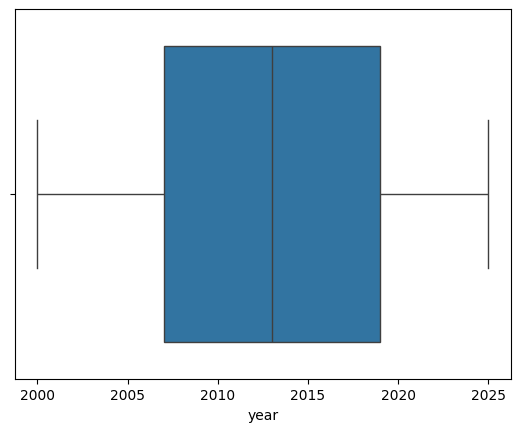

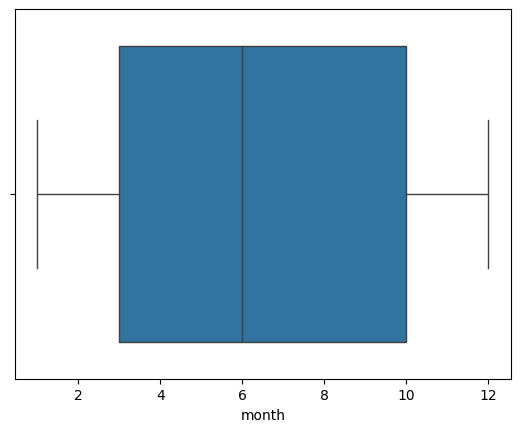

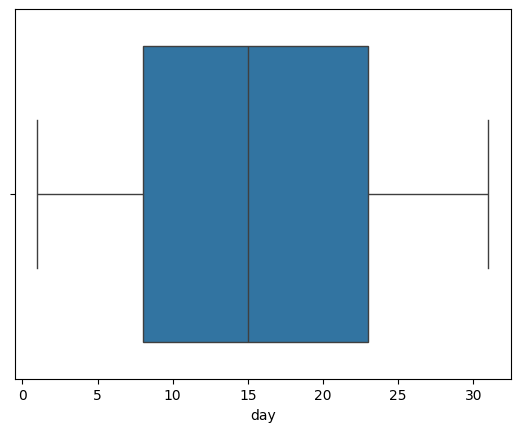

In [62]:
for i in df.select_dtypes(include = [np.number]).columns:
    sns.boxplot(df,x=i)
    plt.show()

In [63]:
df.select_dtypes(include = [np.number]).columns

Index(['latitude', 'longitude', 'depth', 'mag', 'year', 'month', 'day'], dtype='object')

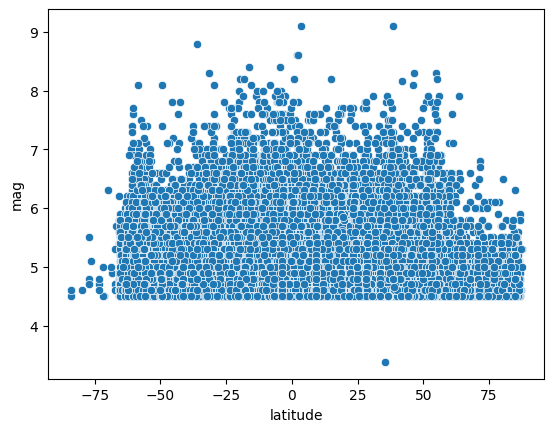

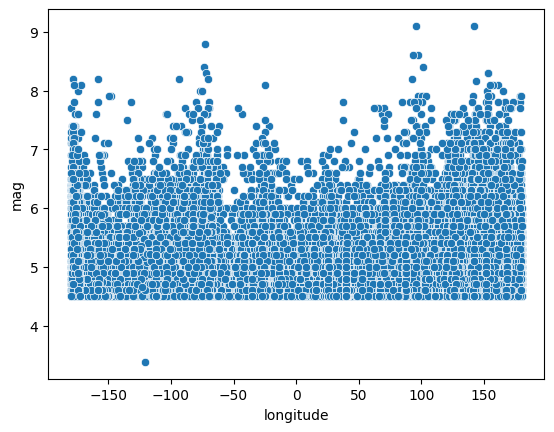

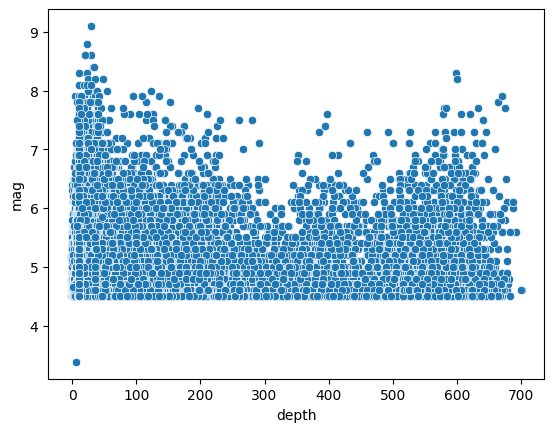

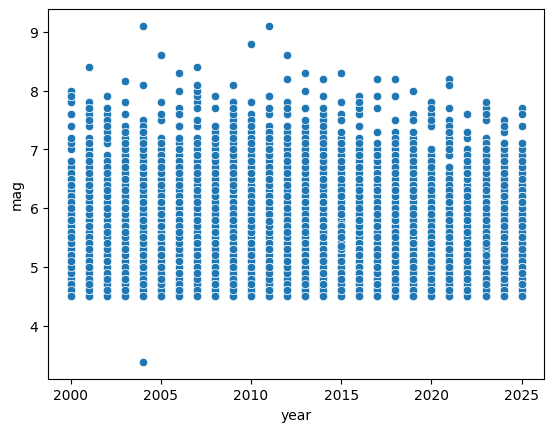

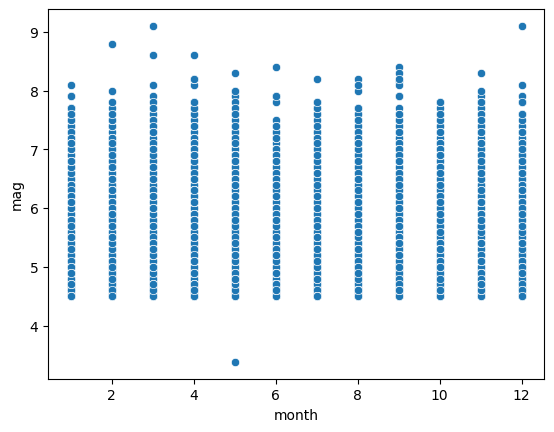

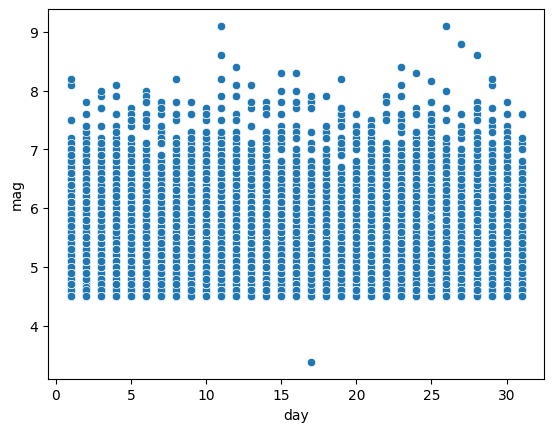

In [65]:
for i in ['latitude', 'longitude', 'depth','year', 'month', 'day']:
  sns.scatterplot(data = df, x = i, y = 'mag')
  plt.show()

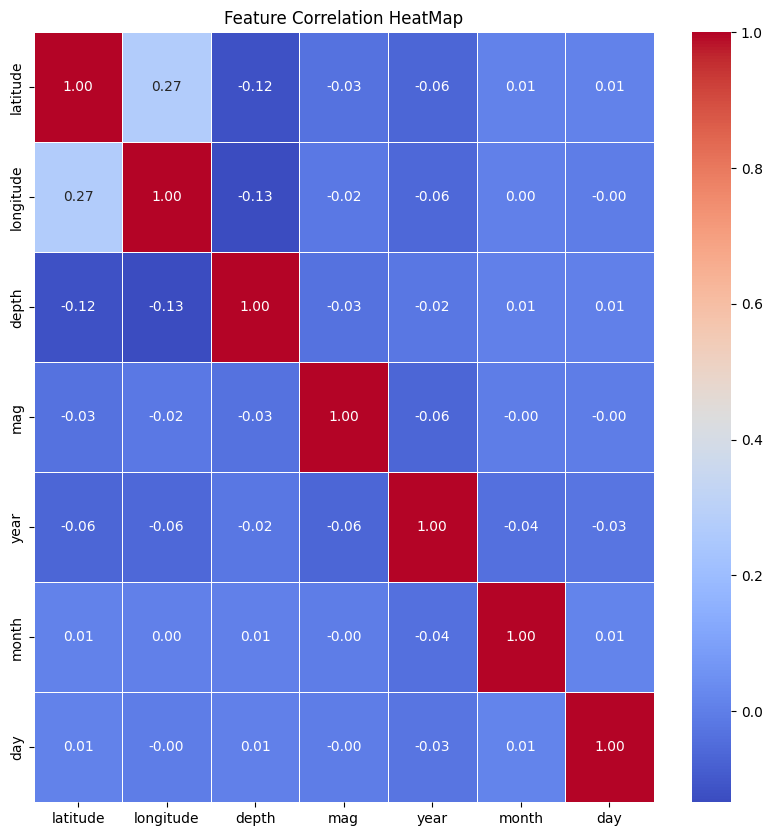

In [69]:
corr = df.corr(numeric_only= True)
plt.figure(figsize =(10,10))
sns.heatmap(corr,annot = True,cmap = 'coolwarm',fmt = '.2f',linewidths= 0.5)
plt.title('Feature Correlation HeatMap')
plt.show()

In [ ]:
df.to_csv('USGS_Earthquake_Dataset_2000-2025_cleaned.csv',index = False)